## Project: Finding Donors for *CharityML*

## Getting Started

In this project, I have employed supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. I have then chosen the best candidate algorithm from preliminary results and further optimized this algorithm to best model the data. My goal with this implementation was to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_.
The data I investigated here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Note that the last column from this dataset, `'income'`, is my target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
# Allowing the use of display() for DataFrames
from IPython.display import display

# Importing supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Loading the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000.

In [4]:
# Total number of records
n_records = len(data.index)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']==">50K"])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=="<=50K"])

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records*100

# Printing the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms is is preprocessed. Fortunately, for this dataset, there are no invalid or missing entries I had to deal with, however, there are some qualities about certain features that were adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features

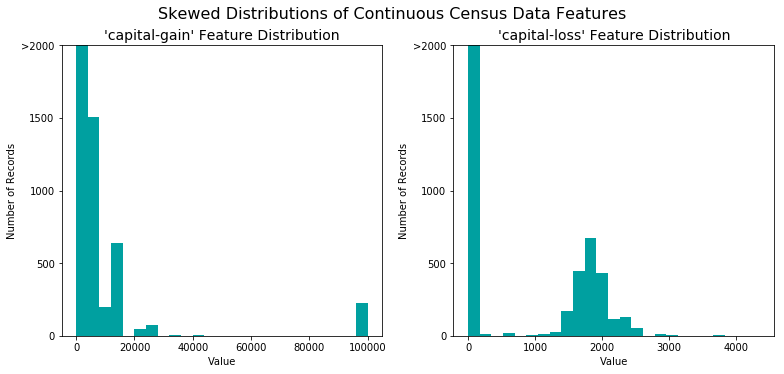

In [5]:
# Spliting the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Therefore I have used the same here

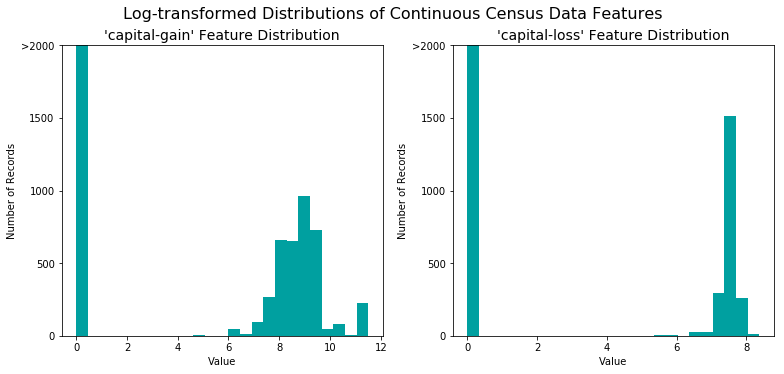

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, I have performed MinMaxScaler() on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. 

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Preprocessing

From the table in **Exploring the Data** above, I saw that there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. I then encoded these feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |


In [11]:
# One-hot encoding the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encoding the 'income_raw' data to numerical values
income=income_raw.replace('>50K',1)
income=income.replace('<=50K',0)

# Printing the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. 
I have splitted the data (both features and labels) into training data (80%) and testing data(20%).

In [12]:
# Importing train_test_split
from sklearn.cross_validation import train_test_split

# Splitting the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Showing the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. I then used an **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$



In [13]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
TN=0
FN=0
accuracy = TP/(TP+FP)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = ((1 + 0.5*0.5)*((precision*recall)/(0.5*0.5*precision+recall)))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

## Which algorithms amongst those listed above are chosen and why ?

### **K-Nearest Neighbors** 

1) This algorithm is mainly used for cases where we need to find similarity between items. Largely KNN could be applied to Recommender systems which help in finding out closely related items and recommending based on that. It could otherwise be used to find out semantically similar documents.

2) KNN algorithm is robust to noisy training data and always works well even if the training data is large.

3) Computation time is very high as we need to compute the distance of each query instance to other training samples. Also, it might not work well without providing a good value for the parameter 'K' and would also be ambiguous when if comes to whether all attributes should be used or only certain attributes should be used.

4) As mentioned the training data is large. KNN also proves to be a good choice for the given dataset as we must find the similarity between those who earn greater than 50K in order to find and recommend based on other attributes whether a donor is likely to donate or not.

### Decision Tree

1) Decision Tree is used in problems where there is a need for classification. Decision Trees are used to deliver quick and precise resolutions to the customer/user. Decision Trees are integrated into a knowledge management platform to facilitate easy knowledge findability. 

2) Decision Trees can learn non-linear relationships because of their hierarchical structure. Moreover, decision trees are robust to outliers. Decisions trees are also easy to comprehend. Decision Trees train faster comparatively to the other chosen models. Therefore decision tree performs well both with classification and regression problems if we are trying to predict a categorical value or even a continuous value. 

3) Simple decision trees tend to overfit the training data and therefore this overfitting serves as the weakness for decision trees. Such decision trees keep branching until they have memorized all the training data.

4) Decision Trees proves to be a suitable model for our data set as the data set we have might possibly have outliers in fields like 'capital-loss' and 'capital-gain'. Also, the decision tree proves good to be in case of our dataset as it helps to classify depending on different attributes that we had, thus building a decision tree that provides a good accuracy and F-Score

### AdaBoostClassifier

1) Adaboostclassifier is used/applied in Face Detection in the real world.

2) First of all this learning algorithm is very fast. AdaBoost can achieve similar results to other classification models without tweaking and tuning the parameters much. In some problems, it is much less susceptible to the problem of overfitting compared to the other learning algorithms. Also, no prior knowledge is needed about the weak learner. This algorithm is also flexible and can be combined with other learning algorithms. Since AdaBoost is versatile, this will work with data that is textual, numeric, discrete etc.

3) Performance of AdaBoost is highly dependant on the data and also the weak learner. AdaBoost can be sensitive to noisy data and outliers. AdaBoost can fail if the weak classifier/learners are too complex. 

4) AdaBoost is appropriate for our dataset as our dataset is mainly uniform and also is a fast learning algorithm. AdaBoost is also versatile so it can work with our dataset flawlessly and moreover for further AdaBoost can be used to extract only the important features from the dataset, which is part of one of the questions to follow.

### Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model I've chosen, it's important that I created a training and predicting pipeline that allowed to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [14]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fitting the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculating the training time
    results['train_time'] = end-start
        
    # Geting the predictions on the test set(X_test),
    # then getting predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculating the total prediction time
    results['pred_time'] = end - start
            
    # Computing accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Computing accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Computing F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # Computing F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Evaluation

KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


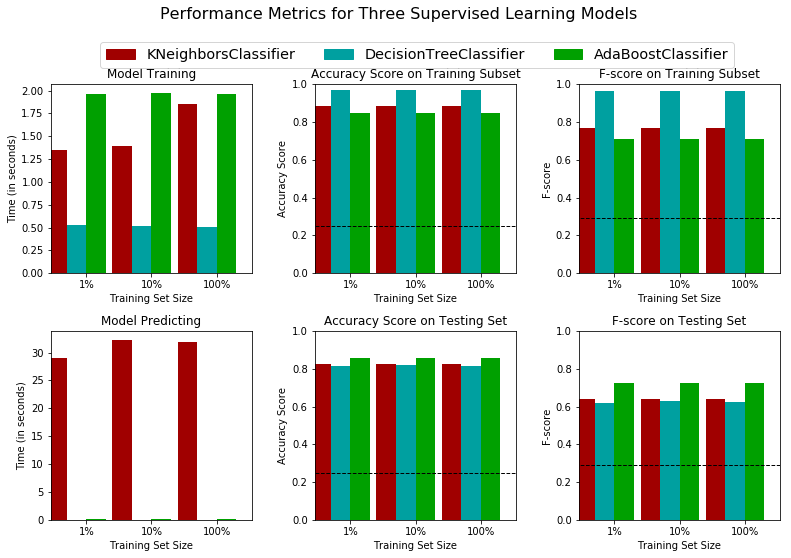

In [15]:
# Importing the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Initializing the three models
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier()
clf_C = AdaBoostClassifier()

# Calculating the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = (int)(0.10*samples_100)
samples_1 = (int)(0.01*samples_100)

# Collecting results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Running metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
I now chose from the three supervised learning models the *best* model to use on the student data.

### Best Model

Out of the three models chosen, AdaBoostClassifier proves to be the most appropriate and best-performing model. I preferred choosing the AdaBoost model over the other models on the grounds that : 
1) It shows a higher F-Score on the test set compared to the other two models. Not only does it show a higher 'accuracy' on the test set but it also registers a comparatively higher F-Score on the test set. A higher F-Score gives a balanced harmonic mean between Recall and Precision and thus proves to be a good performance measure for the classification models.

2) It can be seen that the training time for comparatively larger for the AdaBoost when compared to the DecisionTree. However, the difference in time is not drastic and is very small. This small difference is traded off with a higher accuracy and F-Score on the test set by the AdaBoostClassifier. Moreover, the prediction time for both the DecisionTree and the AdaBoost are quite similar and therefore the trade-off between the training time and the scores on the test set make us prefer the AdaBoost over the Decision Tree model.

3) AdaBoost is an ensemble learning method. Adaptive Boosting proves to be suitable for our dataset as our dataset contains a large number of attributes and thus tuning parameters of the model would yield a comparatively higher accuracy and F-Score than other learning algorithms would have yielded. 

### Describing the Model in Layman Terms

Adaptive Boosting finds its application in various situations in our life. The basic concept behind AdaBoost is to create a strong classifier by the conjuncture of many weak classifiers (hit rate barely better than 50%). Adaptive Boosting involved learning using weak learners/classifiers. AdaBoost works by choosing a base algorithm (e.g. decision trees) and iteratively improving it by accounting for the incorrectly classified examples in the training set. 
We assign equal weights to all the training examples and choose a base algorithm. At each step of the iteration, we apply the base algorithm to the training set and increase the weights of the incorrectly classified examples. We iterate n times, each time applying base learner on the training set with updated weights. This means different attributes have assigned to them different weights depending upon how correctly/wrongly were classified in the previous iterations. The final model is the weighted sum of the n learners. Therefore this model takes into account all weak learner i.e. all attributes assigning a weight to each of them in the process in the proportion in which they contribute to the final model. 


Real-Life Working Example of Adaptive Boosting :

Consider Udacity University. They get 10 applicants for every available freshman slot. The application committee of 6 professionals (A,B,C,D,E,F) is in charge of deciding who to accept. They have been doing this for years and their principle concern is, "Who will succeed at Udacity University?"
The first year, they just had everyone vote yes or no. But after a few years, they could look at their voting records and compare it with how students actually did (for this example a binary : pass or fail).
Since this is Udacity University, they found that Administrator C had the most predictive power. Let's weight her vote higher. Unfortunately, she was only successful at predicting 60% of the time.
The next most powerful predictor was administrator D, but D's answers were very correlated with C. It was as if they were considering the same criteria, but C was just better at it. So let's put D aside for now.
D is better than F, but F appears to be looking at some different criteria than C or D (perhaps focusing on extra curricular activities instead of academics). F's predictive power is less than C or D, but combined with C, F adds more information than D would. That is, C and F is a better classifier than C and D even though D is better than F. Did you get that?
And so it goes. We even find that B's prediction is negatively correlated with student success. But that's fine. We won't fire her. At Udacity University anything different than random is valued. We'll just put a negative coefficient in front of her guess. We did, however, decide that D wasn't adding anything new and let him go back to research.
So now, instead of summing the votes equally A + B + C + D + E + F and picking the top, we weight these weak classifiers to make a much stronger one.



## Model Tuning
Fine tuning the chosen model. Using grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values.

In [16]:
# Importing 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from sklearn.ensemble import AdaBoostClassifier
# Initializing the classifier
clf = AdaBoostClassifier()

# Creating the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[93],'learning_rate':[1.8],'algorithm':['SAMME.R'],}

# Making an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Performing grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# Fitting the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Getting the estimator
best_clf = grid_fit.best_estimator_

# Making predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reporting the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8650
Final F-score on the testing data: 0.7397


## Final Model Evaluation

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.8576      |     0.8650      |
| F-score        |       0.7246      |     0.7397      |


The accuracy score on the testing data increased and rose up to 0.8650. The F-Score on the testing data of the optimized model showed an increase from 0.7246 to 0.7397.
Both the Accuracy Score and the F-Score showed an increase and thus the optimized model proves to be a better model. The Accuracy Score rose from 0.8576 (unoptimised) to 0.8650 (optimised) and the F-Score increased from 0.7246 (unoptimised) to 0.7397 (optimised).

A very large increase can be seen in the results from the optimized model compared the naive predictor scores found in Question 1. The accuracy score from the Naive predictor model was 0.2478 which rose to 0.8650 for the optimised model. The F-Score from the Naive Predictor model was 0.2917 which rose to 0.7397 for the optimised. It is evident that there has been a huge increase in the accuracy and F-Score of the model compared to the naive predictor scores.

----
## Feature Importance

In some cases it might be profitable to predict which features provide the most predictive power. In this case, I wished to identify a small number of features that most strongly predict whether an individual made at most or more than \$50,000.

### Guessing the most important five features without any model implementation

In my opinion, the following five features prove to be the deciding factor for prediction : 
1. Capital-Loss
2. Occupation
3. Capital-Gain
4. Age
5. Hours_per_week

I would rank them in the order given above with the highest priority given to Capital-Loss and lowest to Hours_per_week. 
Highest priority would be given to capital-loss as a person facing a high capital-loss would not be in a position to donate to charity. Occupation comes next as occupations decide whether the person has a high paying job or not. Capital-Gain would be the third factor as it would show whether a person is in a position to donate funds or not. Age comes fourth on the priority list as for whether the donor is old or young would highly be important as it would be a key factor to determine whether they earn beyond 50K or not. Most young people will not be earning very high. Hours_per_Week would be the fifth factor in the model as the number of hours one would work per week could be a deciding factor in the salary/income of the person.


### Extracting Feature Importance

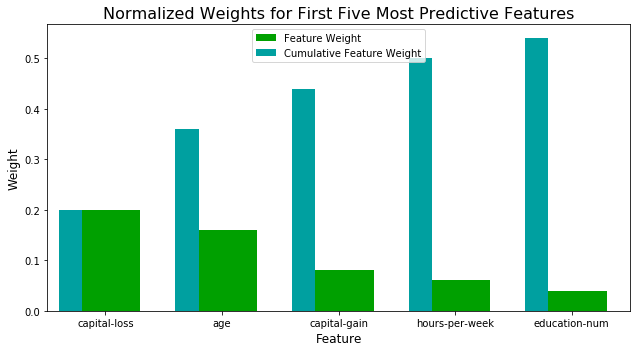

In [17]:
# Importing a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# Training the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train,y_train)

# Extracting the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plotting
vs.feature_plot(importances, X_train, y_train)

## Reporting the feature importance as assessed by model

The five features which were found out to be important by the piece of code are capital-loss, age, capital-gain, hours-per-week,education-num.

The feature I mistook in my assumption of the five most important features was Occupation. Instead, education-num proved to be a more important feature in the prediction. However, the plot shows that capital-loss has the highest weight amongst the features which strengthens my hypothesis that a person who is already incurring a loss is highly unlikely to make a donation. Age, capital-gain and hours_per_week were other features right assumed in my hypothesis. The plot indicates that according to the individual feature weights the ranking was as follows : 
1. Capital-loss
2. Age
3. Capital-Gain
4. Hours-Per-Week
5. Education-num 

with capital-loss having the highest priority and the order following. 

This is indicative of the fact that although I had 4 out of 5 features correctly assumed, my order of ranking them in priority was wrong. Age in the correct feature model proved to be a more important factor than Capital-Gain.

Therefore the plot confirms that my assumptions of features were almost accurate ( 4 out of 5 ) however we had wrongly assumed Capital-gain to be a more important factor than Age which wasn't true as it can be seen from the plot.

### Feature Selection
How does a model perform if I only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. 
Therefore , I tried implementing the model with only the five most important features as obtained above and tried to obtain a score for the same

In [18]:
# Importing functionality for cloning a model
from sklearn.base import clone

# Reducing the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Training on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Making new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Reporting scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8650
F-score on testing data: 0.7397

Final Model trained on reduced data
------
Accuracy on testing data: 0.8341
F-score on testing data: 0.6782


## Effect of feature selection

The final model's F-Score on the reduced data (using only five features) was 0.6782 compared to the final model's F-Score on the data using all features which were 0.7397. 
The final model's Accuracy Score on the reduced data (using only five features) was 0.8341 compared to the final model's F-Score on the data using all features which were 0.8650
Therefore, there was a decrease in the final model's F-Score and the accuracy score on the reduced data (using only 5 features) compared to the data using all features.
This shows that the other attributes/features had significant importance in the prediction as there was a decrease in the accuracy and F-score. 

However, if training time was an important factor, the reduced data can be used as a training set as training time would be given high importance and therefore the trade-off between the score and the training time would be balanced when we prioritise the training time.